In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib.colors as colors
plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c = const.physical_constants['speed of light in vacuum'][0]
e = const.physical_constants['elementary charge'][0]

pathPre = '/home/robert/CU-PWFA/emittance_preservation/simulations/WitnessDelay/'

In [2]:
beam_sigmaz = np.array([5.2, 7.8, 10.4])
witness_delay = np.array([125, 135, 140, 145, 150, 155])
gradient = np.zeros((len(beam_sigmaz), len(witness_delay)))

In [3]:
def alpha_colormap(cmap, cutoff, flip=True):
    N = cmap.N
    cmapt = cmap(np.arange(N))
    alpha = np.ones(N)
    if flip:
        temp = alpha[:int(cutoff*N)]
        M = len(temp)
        alpha[:int(cutoff*N)] = np.linspace(0, 1, M)
    else:
        alpha[int((1-cutoff)*N):] = 0.0
    cmapt[:, -1] = alpha
    cmapt = colors.ListedColormap(cmapt)
    return cmapt

def beam_current(i):
    print(0.5e-9*c/(np.sqrt(2*np.pi)*beam_sigmaz[i]*1e-6))

def plot_sim(i):
    N = len(witness_delay)
    plt.figure(figsize=(18,8), dpi=300)
    gs = gridspec.GridSpec(4, N)
    
    for j in range(N):
        path = pathPre + '%0dumX%0.1fum/' % (witness_delay[j], beam_sigmaz[i])
        data = np.load(path + 'AcceleratingGradient.npy').item()
        gradient[i, j] = np.average(data['gradient'][5:]/1e3)
        density = np.load(path + 'DensitySlice.npy').item()

        # Load in plasma density
        ind = 19
        rhoXY = -np.transpose(density['rhoP'][ind]/e/1e6)+2 #+2 makes it greater than 0 for log scale
        x = density['xfield']
        y = density['yfield']
        
        #Load in the beam densities
        rhoBXY = -np.transpose(density['rhoB'][ind]/e/1e6)
        
        ax1 = plt.subplot(gs[0, j])
        plt.plot(data['x']*1e6, data['energy']/1e3)
        if j == 0:
            plt.ylabel('Energy (GeV)')
        plt.xlabel(r'z ($\mu m$)')
        plt.title('%0dum' % (witness_delay[j]))
        plt.twinx()
        plt.plot(data['x'][1:]*1e6, data['gradient']/1e3, 'm')
        if j == N-1:
            plt.ylabel('Gradient (GeV/m)')

        plt.subplot(gs[1, j])
        #for k in range(len(data['x'])):
        k = 6
        plt.plot(data['xfield']*1e6, data['field'][k, :]/1e9, label=('%0.2f' % (data['x'][k]*1e6)))
        if j == 0:
            plt.ylabel('Field (GeV/m)')
        plt.xlabel(r'z ($\mu m$)')

        plt.subplot(gs[2, j])
        plt.plot(data['x']*1e6, data['gamma_rms'], 'g')
        plt.xlabel(r'z ($\mu m$)')
        if j == 0:
            plt.ylabel('Energy spread (%)')
        
        ax = plt.subplot(gs[3, j])
        ax.imshow(rhoXY, interpolation='gaussian', aspect='auto', extent=[-125, 125, -125, 125],
           norm=colors.LogNorm(vmin=1e16, vmax=2e18), cmap='inferno')
        cmapW = alpha_colormap(plt.cm.get_cmap('rainbow'), 0.1, True)
        ax.imshow(rhoBXY, interpolation='gaussian', aspect='auto', extent=[-125, 125, -125, 125], cmap=cmapW)
        plt.xlabel(r'z ($\mu m$)')
        if j == 0:
            plt.ylabel(r'x ($\mu m$)')
        plt.tight_layout()
        
    plt.show()

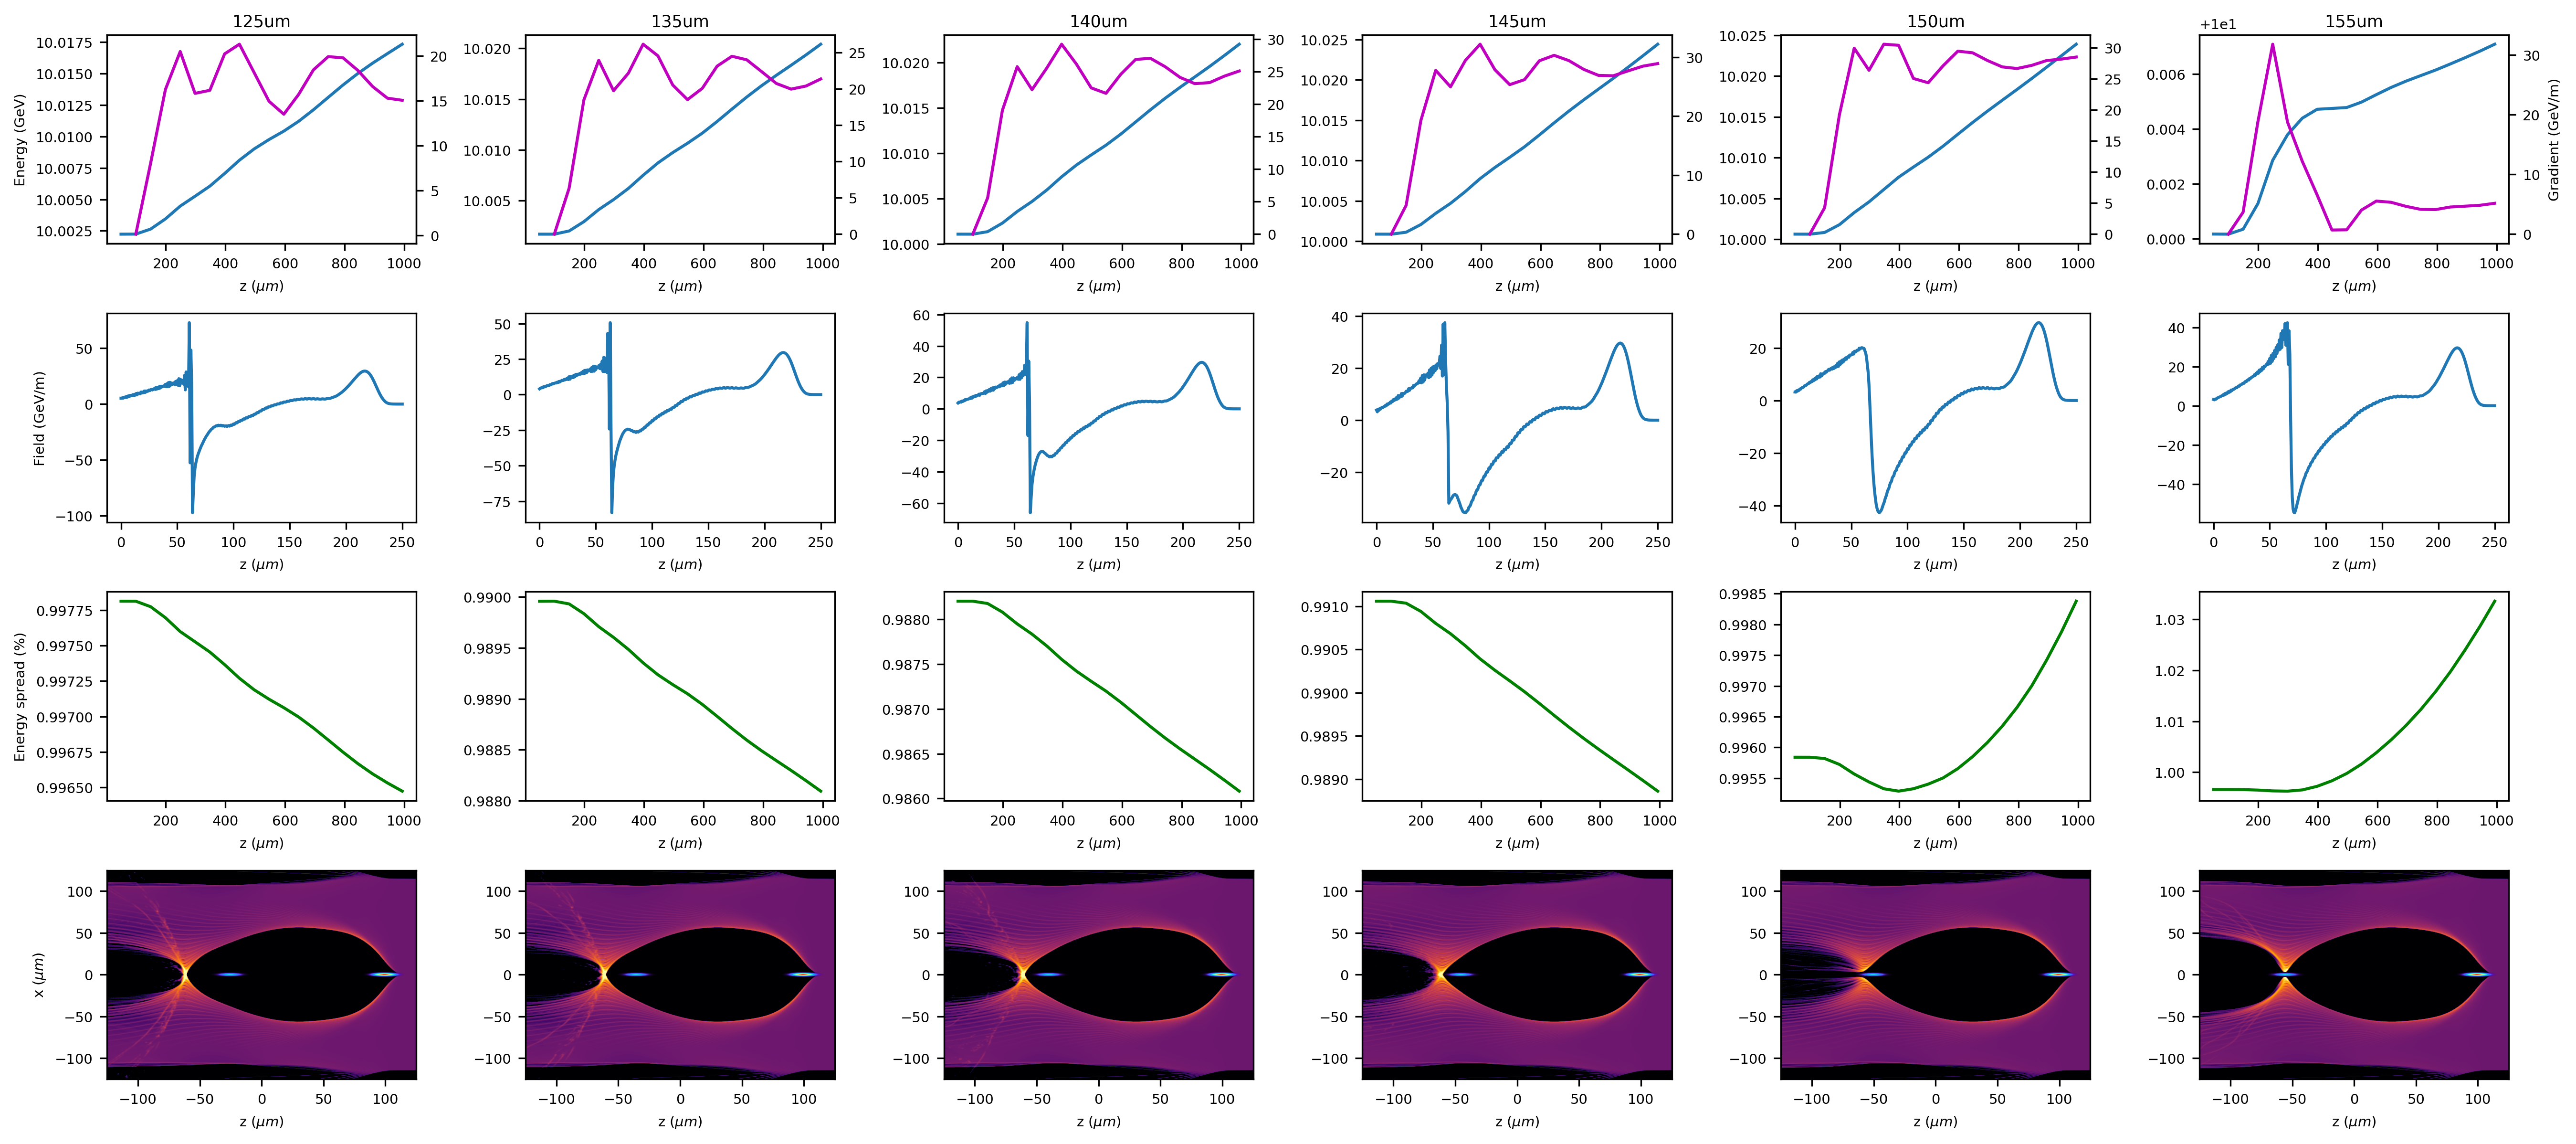

11499.9891194


In [4]:
plot_sim(0)
beam_current(0)

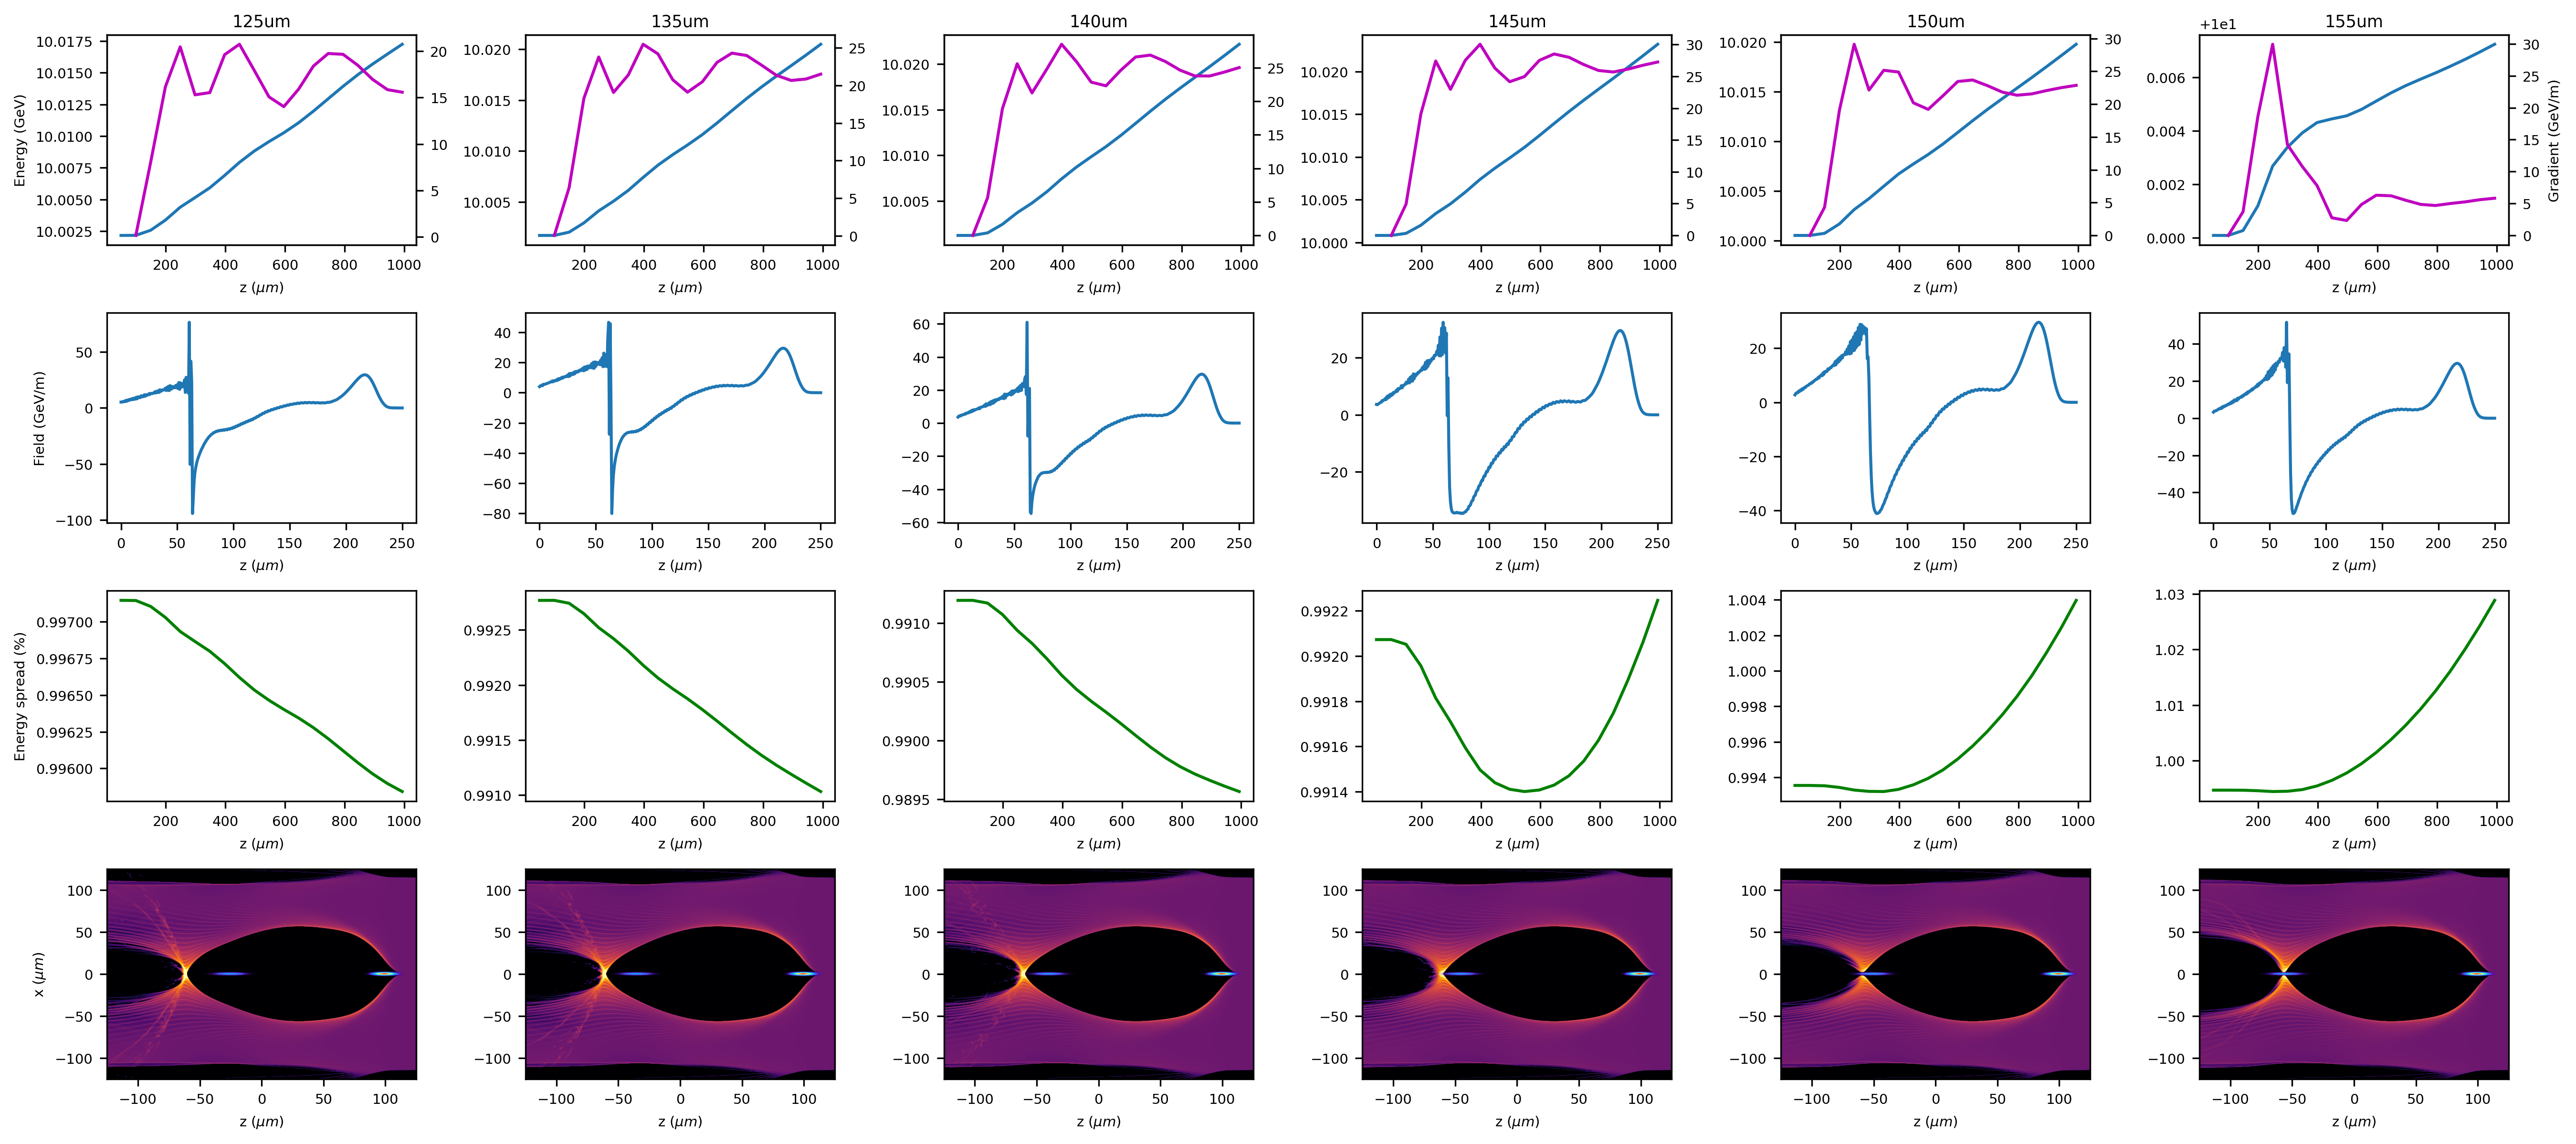

7666.65941293


In [5]:
plot_sim(1)
beam_current(1)

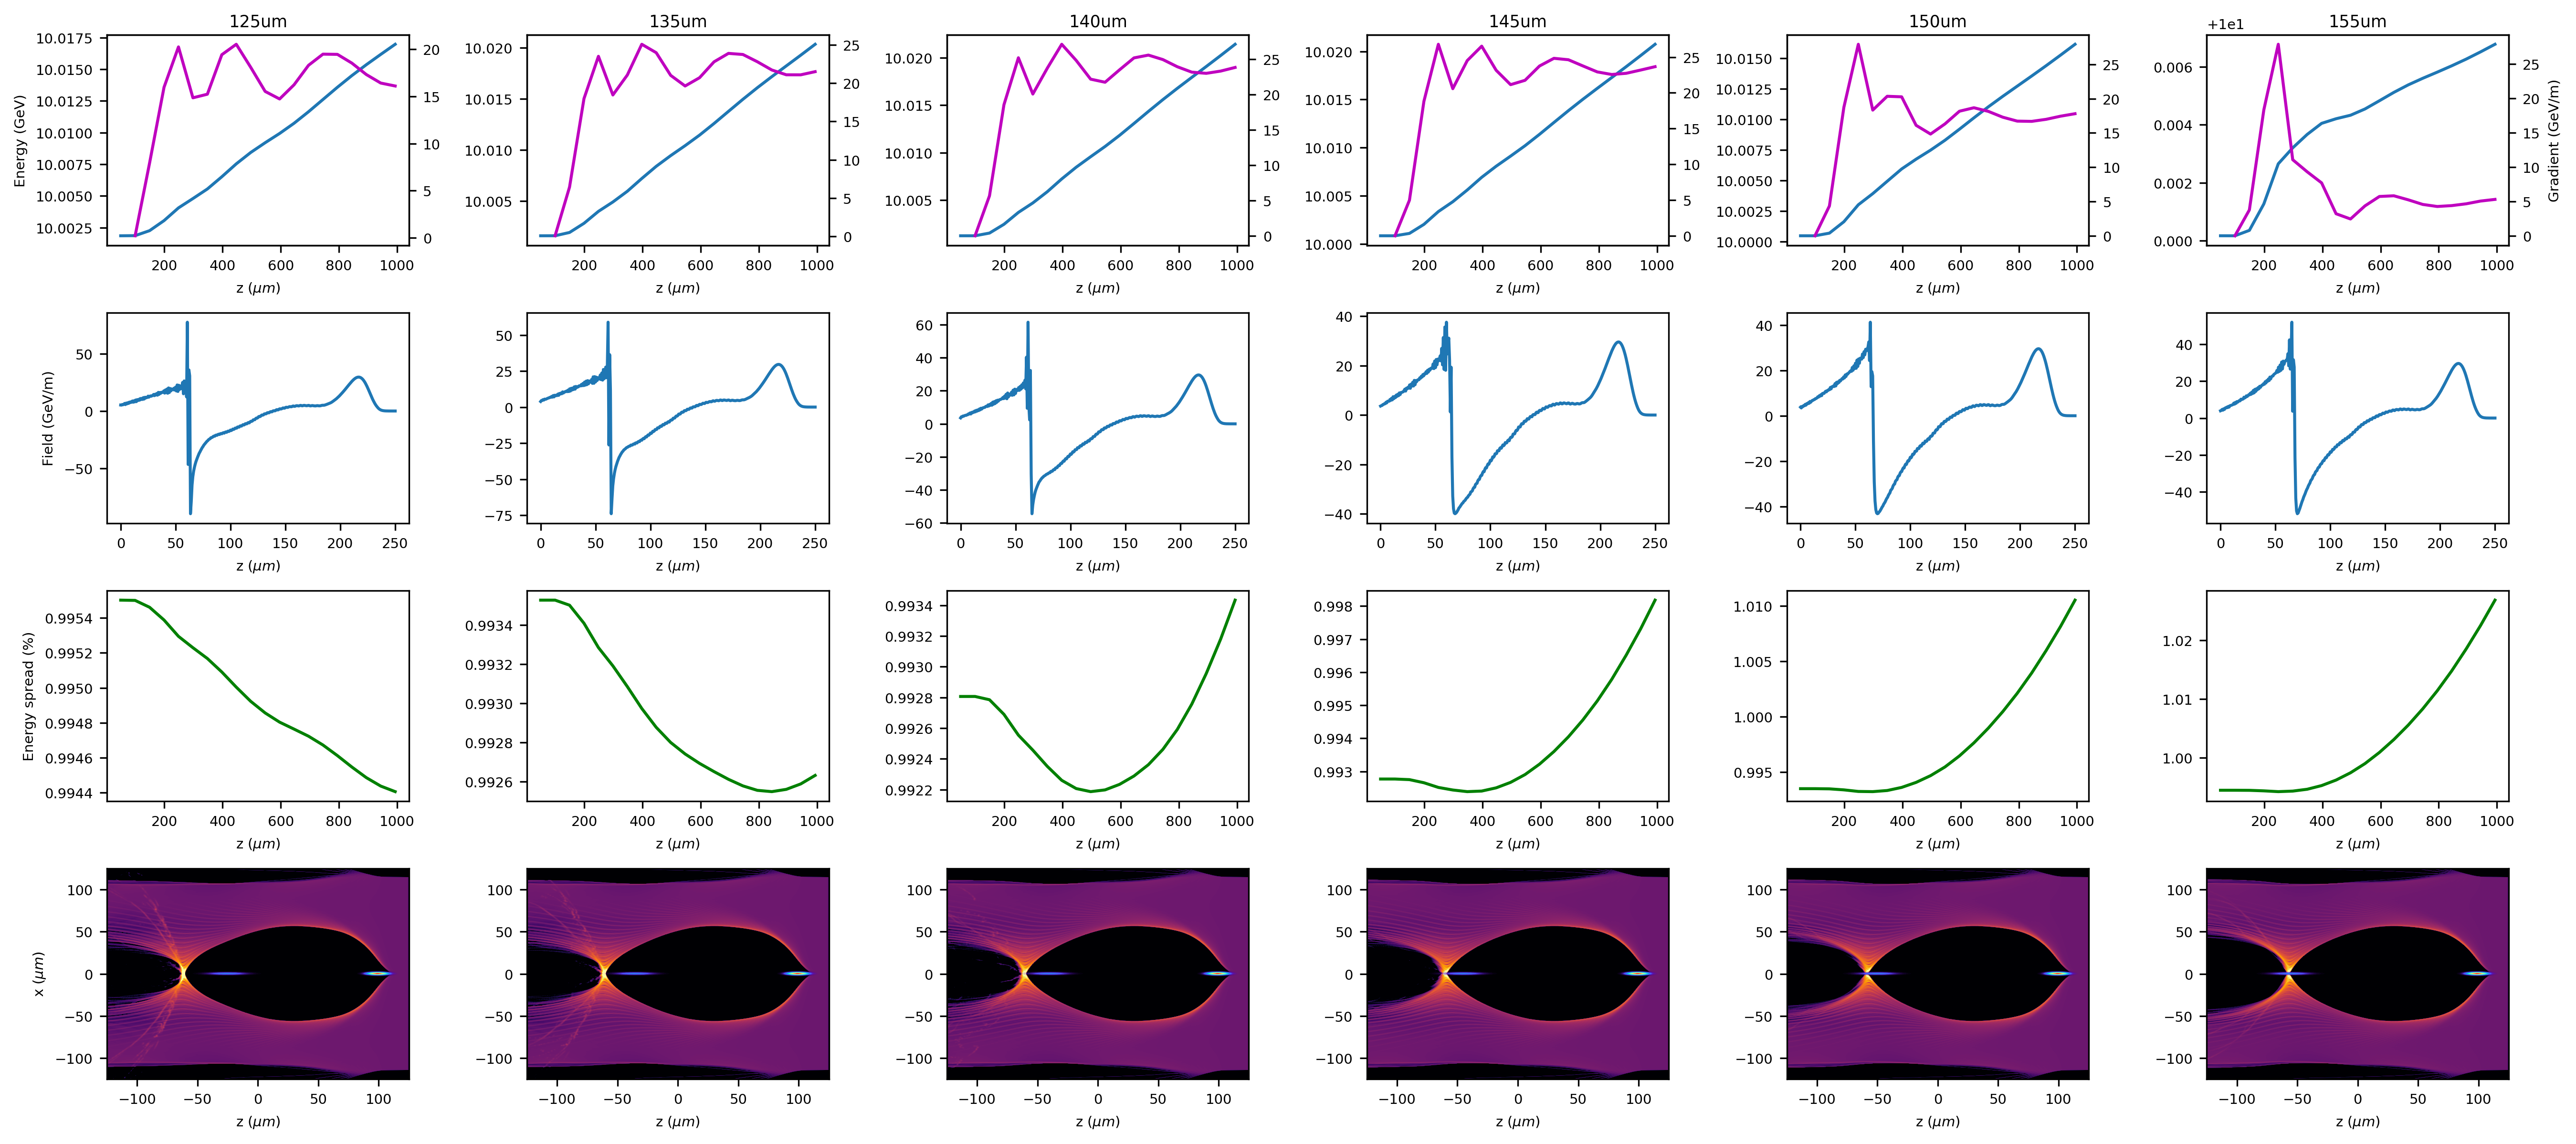

5749.9945597


In [6]:
plot_sim(2)
beam_current(2)

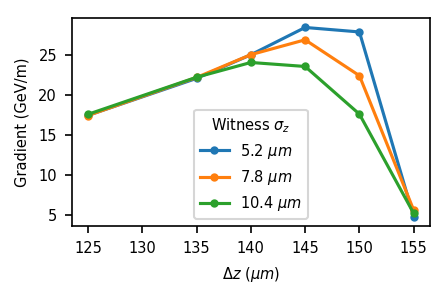

In [7]:
plt.figure(figsize=(3,2), dpi=150)
for i in range(len(beam_sigmaz)):
    plt.plot(witness_delay, gradient[i, :], label=(r'%0.1f $\mu m$' % beam_sigmaz[i]), marker='o', markersize=3)
plt.ylabel('Gradient (GeV/m)')
plt.xlabel(r'$\Delta z$ ($\mu m$)')
plt.legend(title=r'Witness $\sigma_z$')
plt.tight_layout()
plt.show()